# Imports and Dataset

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('file:///C:/Users/103587/OneDrive%20-%20Sasfin/Documents/Data%20Science/Project/insurance_claims.csv')

In [5]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91             0.0   
1    250/500               2000                1197.22       5000000.0   
2    100/300               2000                1413.14       5000000.0   
3    250/500               2000                1415.74       6000000.0   
4   500/1000               1000                1583.91       6000000.0   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported count blank   
0              Y            0  
1              Y            0  
2              N            0  
3              Y            0  
4              N            0  

[5 rows x 40 columns]

## Missing Values 

In [7]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
print(df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'count blank '],
      dtype='object')


In [13]:
df_new = df.drop('count blank ', axis = 1 )

In [16]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91             0.0   
1    250/500               2000                1197.22       5000000.0   
2    100/300               2000                1413.14       5000000.0   
3    250/500               2000                1415.74       6000000.0   
4   500/1000               1000                1583.91       6000000.0   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

## Binding Numeric Data

In [19]:
df_new.describe()

months_as_customer         age  policy_number  policy_deductable  \
count          998.000000  998.000000     998.000000         998.000000   
mean           203.704409   38.936874  546722.205411        1133.767535   
std            114.970764    9.108563  257061.376909         610.335615   
min              0.000000   19.000000  100804.000000         500.000000   
25%            115.250000   32.000000  336188.750000         500.000000   
50%            199.000000   38.000000  533940.500000        1000.000000   
75%            276.000000   44.000000  759819.250000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             998.000000    9.980000e+02     998.000000     998.000000   
mean             1257.035431    1.105314e+06  501168.482966   25176.452906   
std               244.140108    2.298214e+06   71649.287312   27877.379027   
min               433.330000    0.000000e+00  430104.000000       0.000000   
25%              1090.402500    0.000000e+00  448443.500000       0.000000   
50%              1257.595000    0.000000e+00  466445.500000       0.000000   
75%              1415.725000    0.000000e+00  603234.750000   51075.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count     998.000000                998.000000                   998.000000   
mean   -26755.210421                 11.634269                     1.836673   
std     28118.198148                  6.952014                     1.018573   
min   -111100.000000                  0.000000                     1.000000   
25%    -51500.000000                  6.000000                     1.000000   
50%    -22350.000000                 12.000000                     1.000000   
75%         0.000000                 17.000000                     3.000000   
max         0.000000                 23.000000                     4.000000   

       bodily_injuries   witnesses  total_claim_amount  injury_claim  \
count       998.000000  998.000000          998.000000    998.000000   
mean          0.990982    1.487976        52671.292585   7415.831663   
std           0.820328    1.111333        26339.172322   4869.529444   
min           0.000000    0.000000          100.000000      0.000000   
25%           0.000000    1.000000        41737.500000   4285.000000   
50%           1.000000    1.000000        57935.000000   6770.000000   
75%           2.000000    2.000000        70507.500000  11265.000000   
max           2.000000    3.000000       112320.000000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count      998.000000     998.000000   998.000000  
mean      7381.913828   37873.547094  2005.106212  
std       4812.932308   18854.109850     6.020422  
min          0.000000      70.000000  1995.000000  
25%       4435.000000   30257.500000  2000.000000  
50%       6745.000000   42080.000000  2005.000000  
75%      10860.000000   50750.000000  2010.000000  
max      23670.000000   77760.000000  2015.000000

In [21]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [23]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['ages_category'] = pd.cut(df_new['age'], bins=bin_edges, labels=bin_labels)

In [25]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91             0.0   
1    250/500               2000                1197.22       5000000.0   
2    100/300               2000                1413.14       5000000.0   
3    250/500               2000                1415.74       6000000.0   
4   500/1000               1000                1583.91       6000000.0   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported ages_category  
0              Y   Middle Aged  
1              Y   Middle Aged  
2              N   Young Adult  
3              Y   Middle Aged  
4              N   Middle Aged  

[5 rows x 40 columns]

## Creating New Features

In [28]:
df_new["Contract Years"] = df_new["months_as_customer"]/12

In [30]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91             0.0   
1    250/500               2000                1197.22       5000000.0   
2    100/300               2000                1413.14       5000000.0   
3    250/500               2000                1415.74       6000000.0   
4   500/1000               1000                1583.91       6000000.0   

   insured_zip  ... total_claim_amount injury_claim property_claim  \
0       466132  ...              71610         6510          13020   
1       468176  ...               5070          780            780   
2       430632  ...              34650         7700           3850   
3       608117  ...              63400         6340           6340   
4       610706  ...               6500         1300            650   

  vehicle_claim  auto_make  auto_model  auto_year fraud_reported  \
0         52080       Saab         92x       2004              Y   
1          3510   Mercedes        E400       2007              Y   
2         23100      Dodge         RAM       2007              N   
3         50720  Chevrolet       Tahoe       2014              Y   
4          4550     Accura         RSX       2009              N   

  ages_category Contract Years  
0   Middle Aged      27.333333  
1   Middle Aged      19.000000  
2   Young Adult      11.166667  
3   Middle Aged      21.333333  
4   Middle Aged      19.000000  

[5 rows x 41 columns]

## Feature Joining

In [33]:
df_new['total_premiums_paid'] = (df_new['policy_annual_premium']/12) * df_new['months_as_customer']

In [35]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91             0.0   
1    250/500               2000                1197.22       5000000.0   
2    100/300               2000                1413.14       5000000.0   
3    250/500               2000                1415.74       6000000.0   
4   500/1000               1000                1583.91       6000000.0   

   insured_zip  ... injury_claim property_claim vehicle_claim  auto_make  \
0       466132  ...         6510          13020         52080       Saab   
1       468176  ...          780            780          3510   Mercedes   
2       430632  ...         7700           3850         23100      Dodge   
3       608117  ...         6340           6340         50720  Chevrolet   
4       610706  ...         1300            650          4550     Accura   

  auto_model  auto_year  fraud_reported ages_category Contract Years  \
0        92x       2004               Y   Middle Aged      27.333333   
1       E400       2007               Y   Middle Aged      19.000000   
2        RAM       2007               N   Young Adult      11.166667   
3      Tahoe       2014               Y   Middle Aged      21.333333   
4        RSX       2009               N   Middle Aged      19.000000   

  total_premiums_paid  
0        38455.540000  
1        22747.180000  
2        15780.063333  
3        30202.453333  
4        30094.290000  

[5 rows x 42 columns]

In [37]:
df_new['net_value_of_customer'] = df_new['total_premiums_paid'] - df_new['total_claim_amount']

In [39]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91             0.0   
1    250/500               2000                1197.22       5000000.0   
2    100/300               2000                1413.14       5000000.0   
3    250/500               2000                1415.74       6000000.0   
4   500/1000               1000                1583.91       6000000.0   

   insured_zip  ... property_claim vehicle_claim  auto_make auto_model  \
0       466132  ...          13020         52080       Saab        92x   
1       468176  ...            780          3510   Mercedes       E400   
2       430632  ...           3850         23100      Dodge        RAM   
3       608117  ...           6340         50720  Chevrolet      Tahoe   
4       610706  ...            650          4550     Accura        RSX   

  auto_year  fraud_reported  ages_category Contract Years total_premiums_paid  \
0      2004               Y    Middle Aged      27.333333        38455.540000   
1      2007               Y    Middle Aged      19.000000        22747.180000   
2      2007               N    Young Adult      11.166667        15780.063333   
3      2014               Y    Middle Aged      21.333333        30202.453333   
4      2009               N    Middle Aged      19.000000        30094.290000   

  net_value_of_customer  
0         -33154.460000  
1          17677.180000  
2         -18869.936667  
3         -33197.546667  
4          23594.290000  

[5 rows x 43 columns]

In [41]:
df_new.describe()

months_as_customer         age  policy_number  policy_deductable  \
count          998.000000  998.000000     998.000000         998.000000   
mean           203.704409   38.936874  546722.205411        1133.767535   
std            114.970764    9.108563  257061.376909         610.335615   
min              0.000000   19.000000  100804.000000         500.000000   
25%            115.250000   32.000000  336188.750000         500.000000   
50%            199.000000   38.000000  533940.500000        1000.000000   
75%            276.000000   44.000000  759819.250000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             998.000000    9.980000e+02     998.000000     998.000000   
mean             1257.035431    1.105314e+06  501168.482966   25176.452906   
std               244.140108    2.298214e+06   71649.287312   27877.379027   
min               433.330000    0.000000e+00  430104.000000       0.000000   
25%              1090.402500    0.000000e+00  448443.500000       0.000000   
50%              1257.595000    0.000000e+00  466445.500000       0.000000   
75%              1415.725000    0.000000e+00  603234.750000   51075.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  ...  bodily_injuries  \
count     998.000000                998.000000  ...       998.000000   
mean   -26755.210421                 11.634269  ...         0.990982   
std     28118.198148                  6.952014  ...         0.820328   
min   -111100.000000                  0.000000  ...         0.000000   
25%    -51500.000000                  6.000000  ...         0.000000   
50%    -22350.000000                 12.000000  ...         1.000000   
75%         0.000000                 17.000000  ...         2.000000   
max         0.000000                 23.000000  ...         2.000000   

        witnesses  total_claim_amount  injury_claim  property_claim  \
count  998.000000          998.000000    998.000000      998.000000   
mean     1.487976        52671.292585   7415.831663     7381.913828   
std      1.111333        26339.172322   4869.529444     4812.932308   
min      0.000000          100.000000      0.000000        0.000000   
25%      1.000000        41737.500000   4285.000000     4435.000000   
50%      1.000000        57935.000000   6770.000000     6745.000000   
75%      2.000000        70507.500000  11265.000000    10860.000000   
max      3.000000       112320.000000  21450.000000    23670.000000   

       vehicle_claim    auto_year  Contract Years  total_premiums_paid  \
count     998.000000   998.000000      998.000000           998.000000   
mean    37873.547094  2005.106212       16.975367         21357.565242   
std     18854.109850     6.020422        9.580897         12814.598108   
min        70.000000  1995.000000        0.000000             0.000000   
25%     30257.500000  2000.000000        9.604167         11347.157500   
50%     42080.000000  2005.000000       16.583333         20333.321250   
75%     50750.000000  2010.000000       23.000000         29414.821458   
max     77760.000000  2015.000000       39.916667         67916.070833   

       net_value_of_customer  
count             998.000000  
mean           -31313.727343  
std             28587.447703  
min            -98696.934167  
25%            -52404.249792  
50%            -35220.333750  
75%            -14380.450208  
max             48515.443333  

[8 rows x 21 columns]

## More Data Dsitributiona and Visualisation based on Problem statement

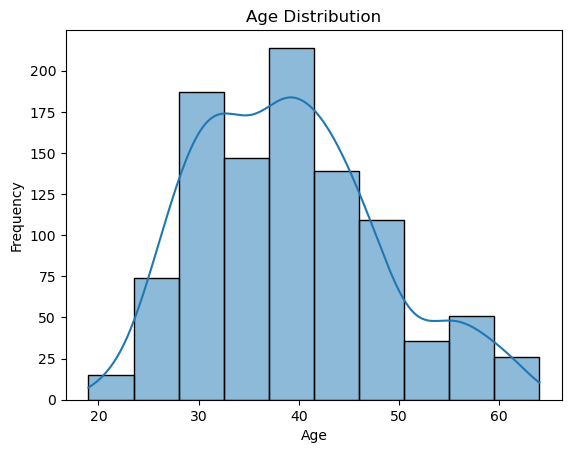

In [45]:
# Age distribution
sns.histplot(df_new['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

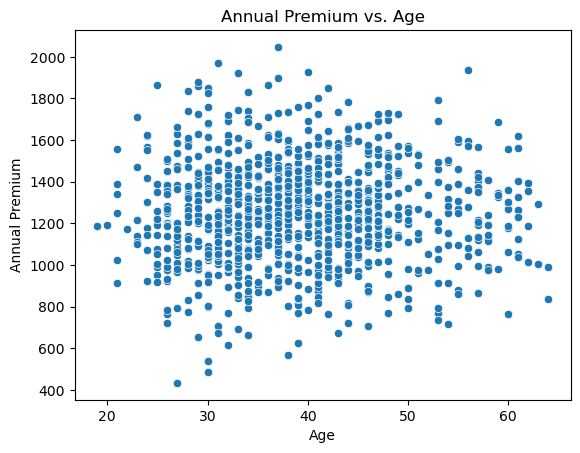

In [48]:
# Policy annual premium vs. age
sns.scatterplot(x='age', y='policy_annual_premium', data=df_new)
plt.title('Annual Premium vs. Age')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

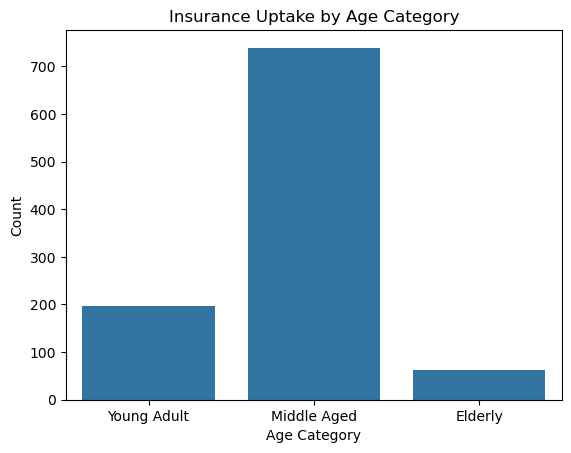

In [50]:
# Count of insured individuals by age category
sns.countplot(x='ages_category', data=df_new)
plt.title('Insurance Uptake by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

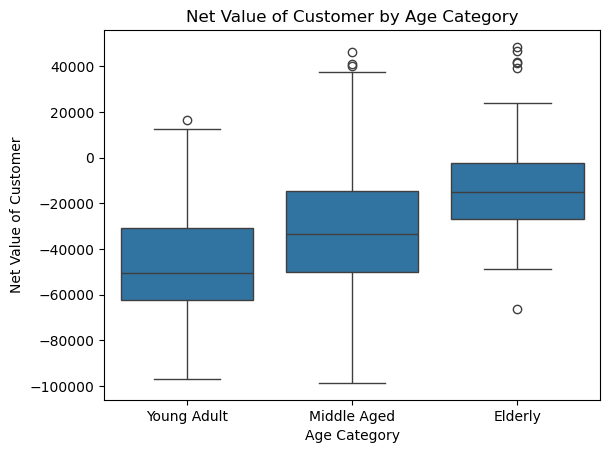

In [78]:
# Net value of customer by age category
sns.boxplot(x='ages_category', y='net_value_of_customer', data=df_new)
plt.title('Net Value of Customer by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Net Value of Customer')
plt.show()

## Correlation Analysis

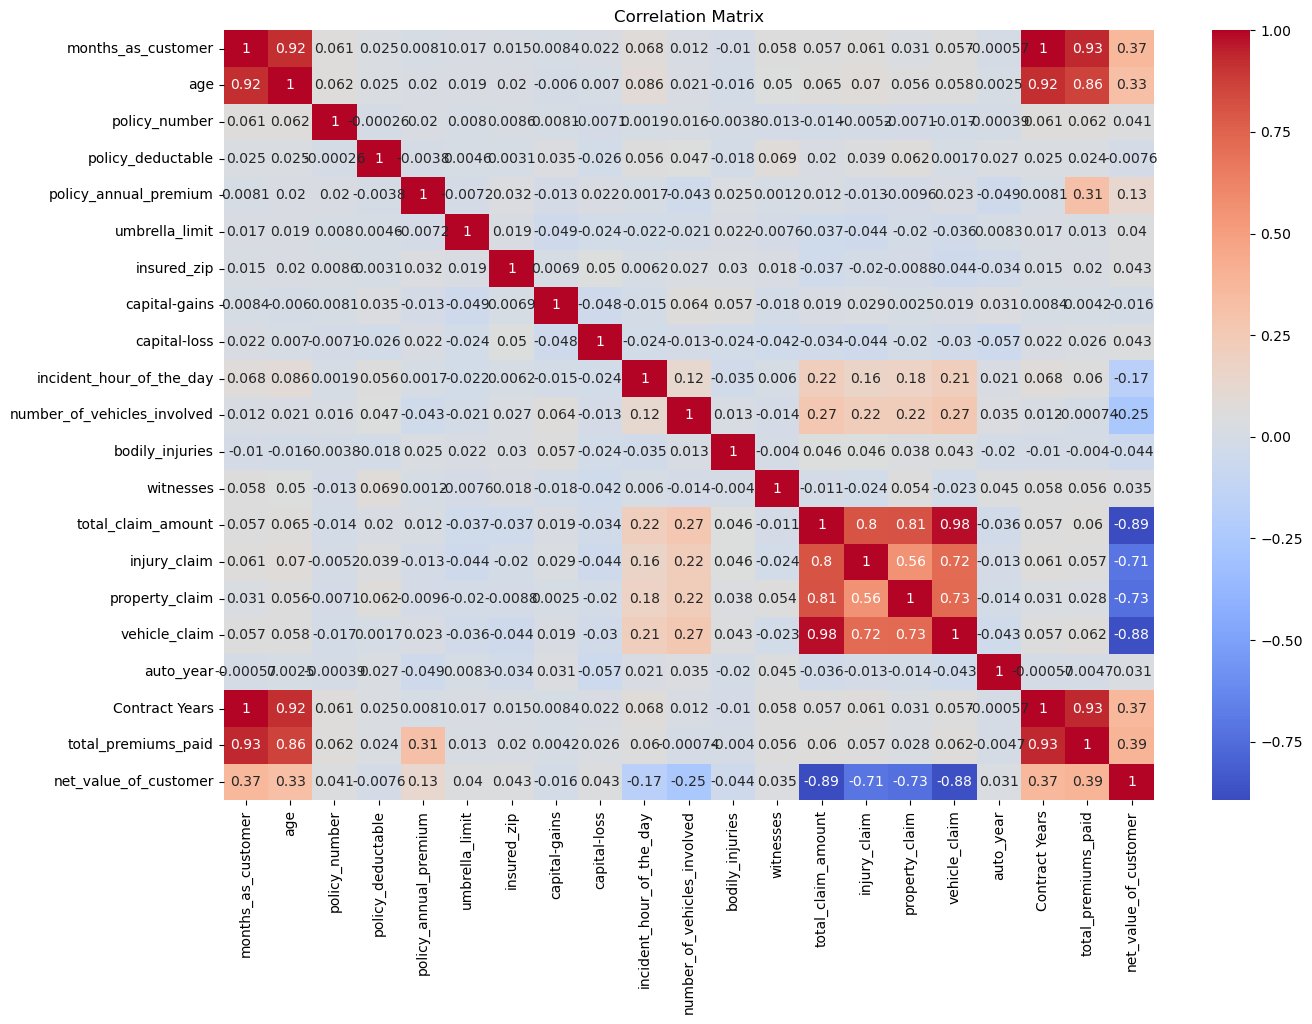

In [58]:
# Select only numeric columns
numeric_df = df_new.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Target Market analysis

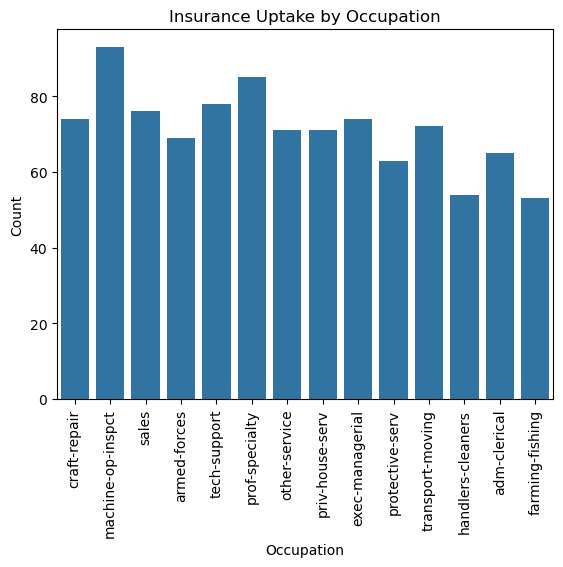

In [56]:
# Insurance uptake by occupation
sns.countplot(x='insured_occupation', data=df_new)
plt.xticks(rotation=90)
plt.title('Insurance Uptake by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

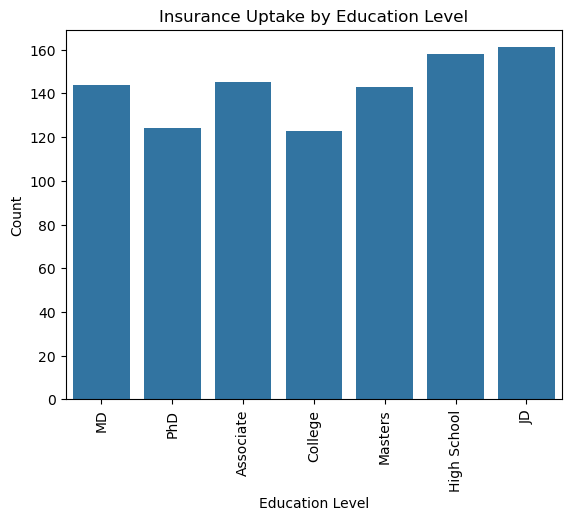

In [60]:
# Insurance uptake by education level
sns.countplot(x='insured_education_level', data=df_new)
plt.xticks(rotation=90)
plt.title('Insurance Uptake by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

## Insurance Uptake by Employment Status

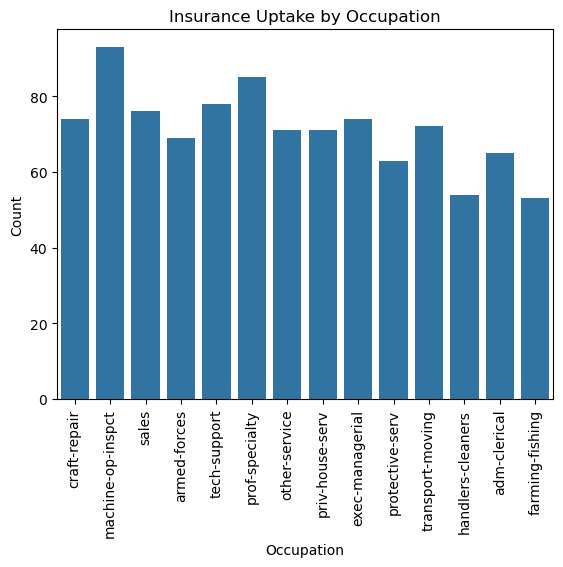

In [75]:
sns.countplot(x='insured_occupation', data=df_new)
plt.xticks(rotation=90)
plt.title('Insurance Uptake by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

## Analysis of Fraud and Claims

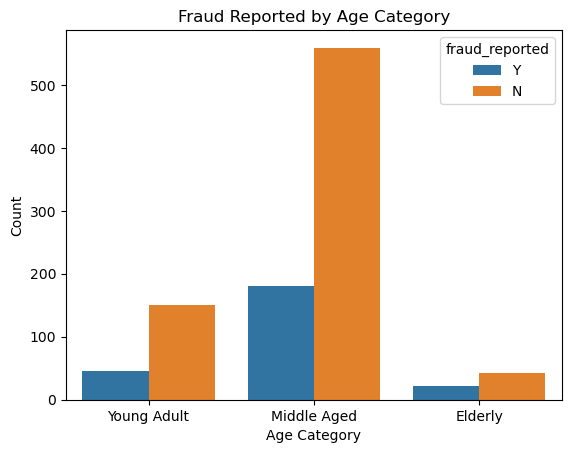

In [63]:
# Fraud reported by age category
sns.countplot(x='ages_category', hue='fraud_reported', data=df_new)
plt.title('Fraud Reported by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

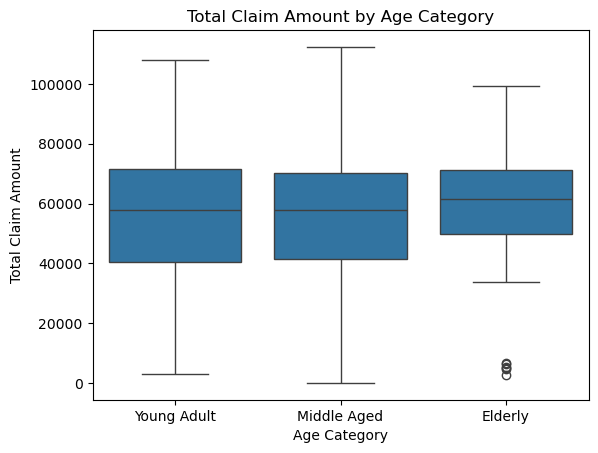

In [65]:
# Total claim amount by age category
sns.boxplot(x='ages_category', y='total_claim_amount', data=df_new)
plt.title('Total Claim Amount by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Claim Amount')
plt.show()

## Customer Lifetime Value Analysis

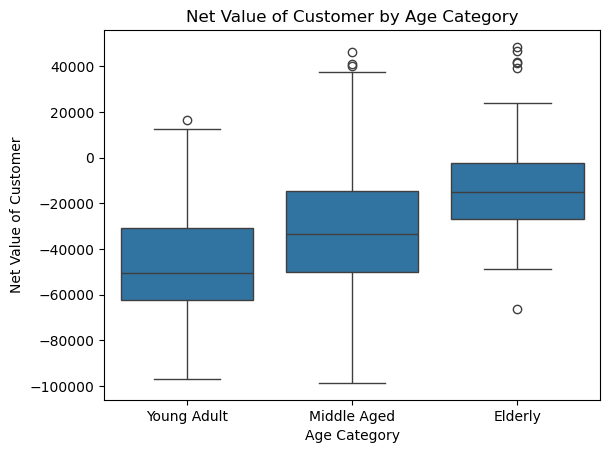

In [68]:
# Net value of customer by age category
sns.boxplot(x='ages_category', y='net_value_of_customer', data=df_new)
plt.title('Net Value of Customer by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Net Value of Customer')
plt.show()

## Market Segmentation

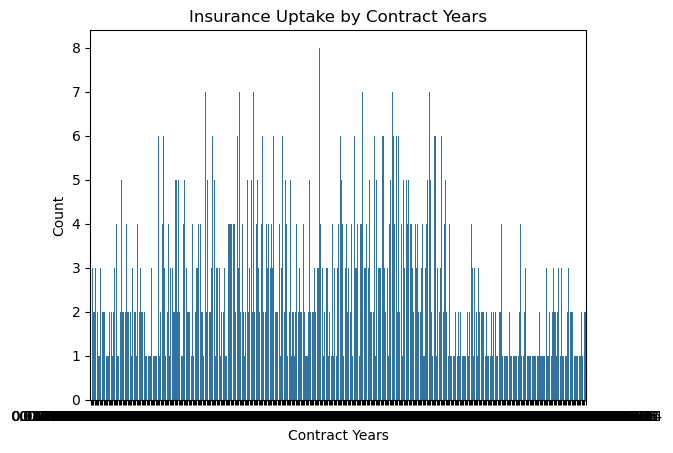

In [71]:
# Insurance uptake by contract years
sns.countplot(x='Contract Years', data=df_new)
plt.title('Insurance Uptake by Contract Years')
plt.xlabel('Contract Years')
plt.ylabel('Count')
plt.show()

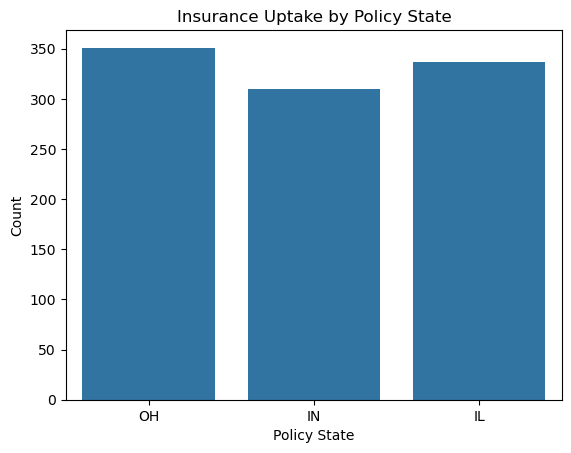

In [73]:
# Insurance uptake by policy type
sns.countplot(x='policy_state', data=df_new)
plt.title('Insurance Uptake by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Count')
plt.show()


## Saving the csv for late

In [81]:
df_new.to_csv('Advanced Features Claims Data - Problem statement focused.csv')

In [83]:
from IPython.display import FileLink

In [85]:
FileLink('Advanced Features Claims Data - Problem statement focused.csv')

C:\Users\103587\11. Intergrated Project\Advanced Features Claims Data - Problem statement focused.csv